# Waste_Management_Model

In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Processed_DatasetsAmount-of Waste-Generated-By-State 32121-0003.csv")

In [3]:
df.head()

,Year,States,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
0,2004,Baden-Württemberg,Residual household and bulky wastes,1605.6,150.0
1,2004,Baden-Württemberg,Separately collected organic wastes,1220.5,114.0
2,2004,Baden-Württemberg,Separately collected recyclables,1645.3,154.0
3,2004,Baden-Württemberg,Other wastes,9.4,1.0
4,2004,Bayern,Separately collected organic wastes,1677.3,135.0


In [4]:
# Check Number of Rows & Columns present in the DataFrame df. 
df.shape

(1046, 5)

## Data Preprocessing

In [5]:
df['Types of Waste'].unique()

array(['Residual household and bulky wastes',
       'Separately collected organic wastes',
       'Separately collected recyclables', 'Other wastes'], dtype=object)

In [6]:
# Check null values present in the DataFrame df.
df.isnull().sum()

Year                                             0
States                                           0
Types of Waste                                   0
Total Household Waste Generated (Tons)           0
Household Waste Generated per Inhabitant (kg)    0
dtype: int64

In [7]:
# Check for duplicate values.
df.duplicated().sum()

0

In [8]:
# Check basic statistics of numeric columns.
df.describe()

,Year,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
count,1046.000000,1046.000000,1046.000000
mean,2012.451243,405.893881,110.816904
std,5.181030,462.755575,80.167121
min,2004.000000,0.100000,1.000000
25%,2008.000000,29.400000,21.000000
50%,2012.000000,230.300000,125.000000
75%,2017.000000,613.750000,163.000000
max,2021.000000,1799.100000,349.000000


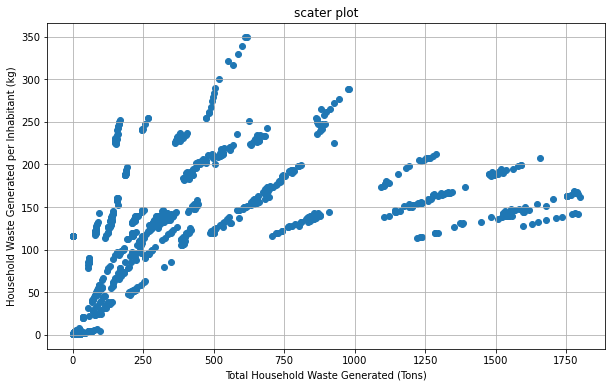

In [9]:
# Visualize the scater plot
plt.figure(figsize=(10, 6))
plt.scatter(x= df['Total Household Waste Generated (Tons)'],y=df['Household Waste Generated per Inhabitant (kg)'] )
plt.ylabel('Household Waste Generated per Inhabitant (kg)')
plt.xlabel('Total Household Waste Generated (Tons)')
plt.title('scater plot')
plt.grid(True)
plt.show()

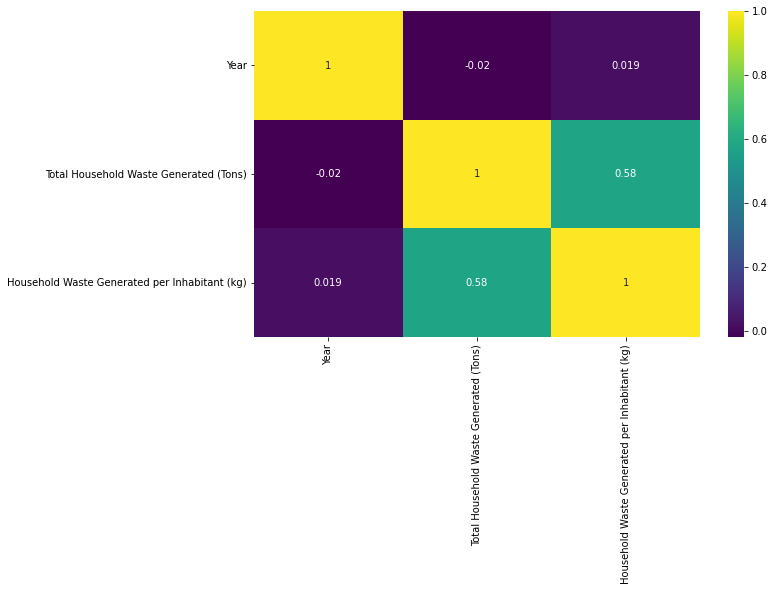

In [10]:
# Create a heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap ='viridis')
plt.show()

**No such strong co-relation found**

In [11]:
# unique waste_types 
waste_types= df['Types of Waste'].unique()

## Encoding

In [12]:
# Use lable encoding for column 'Type of waste'
encoder = LabelEncoder()
df['Types of Waste'] = encoder.fit_transform(df['Types of Waste'])
df['States'] = encoder.fit_transform(df['States'])

In [13]:
# Create encoded lables
encoded_labels = encoder.fit_transform(waste_types)

# Create a mapping of waste types to encoded labels
mapping = dict(zip(waste_types, encoded_labels))

# Print the mapping
for waste_type, encoded_label in mapping.items():
    print(waste_type, "is encoded as", encoded_label)

Residual household and bulky wastes is encoded as 1
Separately collected organic wastes is encoded as 2
Separately collected recyclables is encoded as 3
Other wastes is encoded as 0


In [14]:
# Define dependant & independant variables.
X = df[['Year','States','Types of Waste']] # Independant variables
y = df[['Total Household Waste Generated (Tons)','Household Waste Generated per Inhabitant (kg)']] # dependant variables

## Scaling

In [15]:
# Scale the data using Min Max Scaler.
scaler = MinMaxScaler(feature_range=(-1, 1))
columns_to_scale = ['Total Household Waste Generated (Tons)', 'Household Waste Generated per Inhabitant (kg)']
y_scaled = scaler.fit_transform(df[columns_to_scale])
y_scaled = pd.DataFrame(y_scaled, columns=columns_to_scale)

In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [17]:
# Models
reg_model = LinearRegression()
rf_model  = RandomForestRegressor()

## Train the Model

In [18]:
# Model training
reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# Prediction.
y_pred_reg = reg_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)

In [20]:
# Prediction for Regression Model
y_pred_reg

array([[-0.34877272, -0.24756873],
       [-0.86088426, -0.59433239],
       [-0.71137261, -0.418602  ],
       [-0.69745359, -0.58619278],
       [-0.65705472, -0.54237291],
       [-0.53592003, -0.24570153],
       [-0.18555378, -0.11414116],
       [-0.65747816, -0.29179698],
       [-0.74176215, -0.43012586],
       [-0.66595191, -0.57108047],
       [-0.51241511, -0.13042038],
       [-0.63153723, -0.2946269 ],
       [-0.1540521 , -0.09902885],
       [-0.24945757, -0.27324218],
       [-0.43994132, -0.28214032],
       [-0.47234343, -0.42612903],
       [-0.79364402, -0.42446603],
       [-0.4375053 , -0.40025139],
       [-0.69189285, -0.56825055],
       [-0.79899304, -0.56769621],
       [-0.65392999, -0.40631961],
       [-0.32860425, -0.14305291],
       [-0.79788089, -0.56410777],
       [-0.47456773, -0.43330592],
       [-0.83605547, -0.60075075],
       [-0.71693336, -0.43654423],
       [-0.46699441, -0.28289885],
       [-0.41511254, -0.28855868],
       [-0.31838319,

In [21]:
# Prediction for Ramdom Forest  Model
y_pred_rf

array([[-0.93577654, -0.51454023],
       [-0.99517621, -0.99787356],
       [-0.32456142, -0.14666667],
       [-0.99676598, -0.88142019],
       [-0.9902846 , -0.97465333],
       [-0.85805225, -0.26028736],
       [-0.61887938, -0.2166092 ],
       [-0.82690828, -0.61586207],
       [-0.45939633,  0.19781609],
       [-0.99740967, -0.99971264],
       [-0.67236131, -0.25827586],
       [-0.72340856, -0.47729885],
       [-0.56687493, -0.37224138],
       [ 0.43646915, -0.31356322],
       [-0.90897165, -0.72390805],
       [-0.40600334,  0.22517241],
       [-0.55611784,  0.05034483],
       [-0.0191662 ,  0.40718391],
       [-0.99656698, -1.        ],
       [-0.97668482, -0.94174826],
       [-0.18379322,  0.03281609],
       [ 0.34900611, -0.13344828],
       [-0.97632018, -0.94364482],
       [-0.38441023,  0.25074713],
       [-0.99625347, -0.95082688],
       [-0.29425236, -0.12528736],
       [ 0.33368872, -0.13798851],
       [-0.18800556, -0.31591954],
       [-0.78536854,

In [22]:
# Calculate MSE for Linear Regression and Random Forest
mse_reg = mean_squared_error(y_test, y_pred_reg)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error for Regression Model : ', mse_reg)
print('Mean Squared Error for Random Forest Model : ', mse_rf)

Mean Squared Error for Regression Model :  0.1724613677779348
Mean Squared Error for Random Forest Model :  0.0022456582824966352


**Mean Squared Error for 'Random Forest Model' is very low, Means it will perform better.**

In [23]:
# Model Score 
reg_model_score = reg_model.score(X_test,y_test)
rf_model_score = rf_model.score(X_test,y_test)
print('Regression Model Score : ', round(reg_model_score,3))
print('Random Forest Model Score : ', round(rf_model_score,3))

Regression Model Score :  0.194
Random Forest Model Score :  0.988


**A higher model score indicates better predictive performance, so the Random Forest Model is considered as better fit.**

## Cross-Validation

In [24]:
# Calculate cross-validation scores
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores for Random Forest Model:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: R-squared Score = {score:.3f}")

# Calculate and print the mean score
mean_score = cross_val_scores.mean()
print(f"Mean Cross-Validation Score: {mean_score:.3f}")

Cross-Validation Scores for Random Forest Model:
Fold 1: R-squared Score = 0.978
Fold 2: R-squared Score = 0.990
Fold 3: R-squared Score = 0.982
Fold 4: R-squared Score = 0.996
Fold 5: R-squared Score = 0.989
Mean Cross-Validation Score: 0.987


## Hyperparameter Tuning

In [29]:
# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [100, 200, 300],           
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]}
    
# Create the GridSearchCV object.
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [30]:
# Fit the grid search on training dataset.
final_model = grid_search.fit(X_train, y_train)

In [31]:
# Print the best hyperparameters and the corresponding R-squared score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared Score: -0.0027416951430900074


In [32]:
# Prediction after Fine Tuning
y_pred_fine_tune = final_model.predict(X_test)

## Conclusion:
- Model Performance: Two models were trained on the data – the Linear Regression Model and the Random Forest Regression Model. Their performance scores were as follows:

         Regression Model Score: 19 %
         Random Forest Model Score: 99 %
      
- Cross-Validation: The Random Forest Model underwent cross-validation, assessing its consistency across different data subsets. Average Cross-Validation Score is 0.987. This underscores the model's robustness and its capacity to generalize effectively to new data.

- Fine Tuning: To enhance the Random Forest Model's performance, a grid search was conducted to fine-tune its hyperparameters. This optimization process, guided by negative mean squared error, aims to enhance the model's accuracy and predictive power.

The Random Forest Regression Model is a suitable choice for predicting the output, based on the provided features. It has demonstrated excellent performance, generalization capabilities and potential for further improvement through hyperparameter tuning.